### Bear put spread
    A bear call spread strategy is built by going long on put option and simultaneously selling a lower strike put option. The aim of this strategy is to benefit from small negative movements in the stock. In this notebook, we will build the payoff graph for long 880 strike put and short 860 strike put on Infosys.



In [10]:
import numpy as np
import matplotlib.pyplot as plt
# For making an attractive and informative statistical graph
plt.style.use('seaborn-darkgrid')

### Put payoff
We define a function that calculates the payoff from buying a put option. The function takes sT which is a range of possible values of the stock price at expiration, the strike price of the put option and premium of the put option as input. It returns the put option payoff.

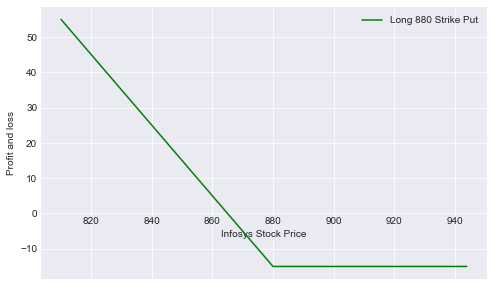

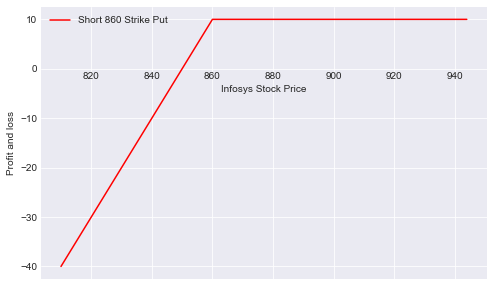

Max Profit: 15.0
Max Loss: -5.0


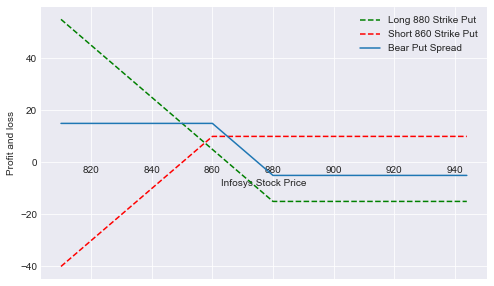

In [14]:
def put_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, strike_price - sT, 0) - premium 

# Define parameters
# Infosys stock price 
spot_price = 900 

## Long put
strike_price_long_put = 880 
premium_long_put = 15

# Short put
strike_price_short_put = 860 
premium_short_put = 10

# Stock price range at expiration of the put
sT = np.arange(0.9*spot_price,1.05*spot_price,1) 

# Long 880 strike put payoff

payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)

# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_put,label='Long 880 Strike Put',color='g')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()


# Short 860 strike call payoff

payoff_short_put = put_payoff(sT, strike_price_short_put, premium_short_put) * -1.0
# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_put,label='Short 860 Strike Put',color='r')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

# Bear call spread payoff

payoff_bear_put_spread = payoff_long_put + payoff_short_put


print ("Max Profit:", max(payoff_bear_put_spread))
print ("Max Loss:", min(payoff_bear_put_spread))

# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_put,'--',label='Long 880 Strike Put',color='g')
ax.plot(sT,payoff_short_put,'--',label='Short 860 Strike Put',color='r')
ax.plot(sT,payoff_bear_put_spread,label='Bear Put Spread')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

Max Profit: 15.0
Max Loss: -5.0

The max profit is capped at INR 15 and the max loss is limited to INR 5. Therefore, this strategy is suitable when your outlook is moderately bullish on the stock.
